# Exemple d'utilisation d'un jeu de données CTD sous forme de séries temporelles

Pour plus de contexte voir: [README](https://github.com/OGSL-SLGO/examples/blob/main/examples/ctd-time-series/)

## Partie 1: Exploration

L'url suivante nous permet de voir les variables de ce jeu de données et de les filter
https://erddap.ogsl.ca/erddap/tabledap/mpoMaritimeStJohnCTD.html

Nous voyons qu'il y a une colonne nom de site (site_name) et une colonne de temps (time)

Dans un premier temps, essayons de comprendre la distribution temporelle de ce jeu de données.

Le volume de données pourrait être élévé alors filtrons les données sur une année seulement.


In [1]:
import pandas as pd

data_url = "https://erddap.ogsl.ca/erddap/tabledap/mpoMaritimeStJohnCTD.csv?site_name%2Cdepth%2Ctime&time%3C=2020-07-26T00%3A00Z&orderBy(%22time%22)"

dataframe = pd.read_csv(data_url, header=[0,1])
dataframe.head()


site_name depth                  time
  Unnamed: 0_level_1     m                   UTC
0       SJR_Evandale  20.0  2019-07-24T14:36:00Z
1       SJR_Evandale  20.0  2019-07-24T14:37:00Z
2       SJR_Evandale  20.0  2019-07-24T14:38:00Z
3       SJR_Evandale  20.0  2019-07-24T14:39:00Z
4       SJR_Evandale  20.0  2019-07-24T14:40:00Z

On remarque que la granularité temporelle est très fine (1s)

Ces données contiennent deux lignes d'en-têtes (nom de variables et unités). Pour faciliter, l'utilisation de plotly nous allons en supprimer une (celle des unités)

In [2]:
dataframe.columns = dataframe.columns.droplevel(-1)

Création d'un graphique qui affiche:
- en y, la profondeur
- en x, le temps


Afin d'éviter des lenteurs dans l'affichage, nous allons rééchantillonner les données à la journée au lieu de la seconde.

In [3]:
dataframe['time'] = pd.to_datetime(dataframe['time'])
resampled = dataframe.groupby("site_name").resample(rule="D", on="time").last()[["depth"]]
resampled = resampled.reset_index()
resampled.head()

site_name                      time  depth
0  CB_intertidal 2019-10-08 00:00:00+00:00    0.5
1  CB_intertidal 2019-10-09 00:00:00+00:00    0.5
2  CB_intertidal 2019-10-10 00:00:00+00:00    0.5
3  CB_intertidal 2019-10-11 00:00:00+00:00    0.5
4  CB_intertidal 2019-10-12 00:00:00+00:00    0.5

Affichons le graphique

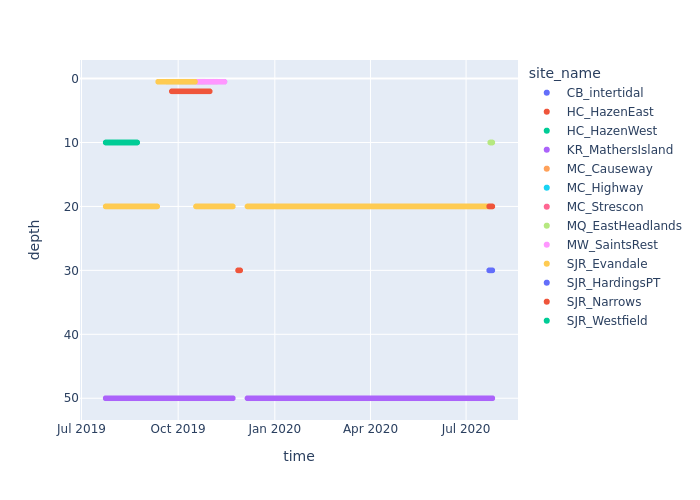

In [4]:
import plotly.express as px

fig = px.scatter(resampled, x="time", y="depth", color="site_name")
fig.update_yaxes(autorange="reversed")

# Remove "png" to display an interactive graph
fig.show("png")

On remarque que le jeu de données contient des mesures pour plusieurs site (localisation) est qu'à chaque localisation les mesures sont prises à une profondeur bien définie.

Ces données sont donc exploitable comme des séries temporelles (et non des profils de colonne d'eau)

Dans le notebook suivant, nous effectueront une analyse temporelle de température pour un des site SJR_Evandale qui semble avoir des données sur une large amplitude temporelle.
